# Diamonds EDA 

**About Dataset**

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

# Read and load training Data

In [2]:
data = pd.read_csv("../input/diamonds/train.csv")

In [3]:
#data have 11 features
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# check missing values

In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Duplicates

In [5]:
#drop duplicates if there is
data=data.drop_duplicates()

# data information

In [6]:
#drop Unnamed: 0 column 
data.drop('Unnamed: 0',axis=1,inplace=True)
#data information such as shape and dtypes for all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


# statistics information of data

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# correlation 

<AxesSubplot:>

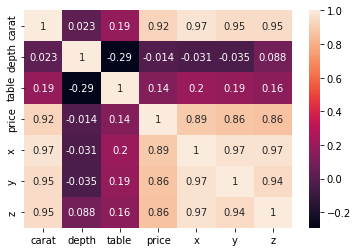

In [8]:
#checking correlation for numeric features
sns.heatmap(data.corr(),annot=True)

# Detect Outliers& Visualization

<AxesSubplot:xlabel='cut', ylabel='price'>

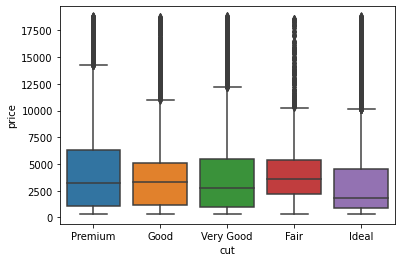

In [9]:
# checking outliers of price with relation to cut 
sns.boxplot( x=data["cut"], y=data["price"] )

<AxesSubplot:xlabel='color', ylabel='table'>

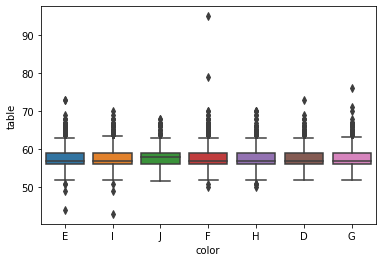

In [10]:
# checking outliers of price with relation to table 
sns.boxplot( x=data["color"], y=data["table"] )

<AxesSubplot:xlabel='carat'>

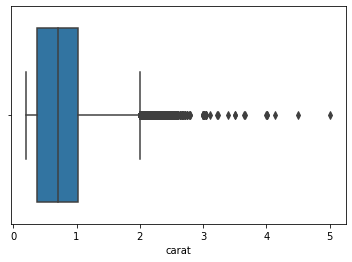

In [11]:
#outliers for carat
sns.boxplot( x=data["carat"])

<AxesSubplot:>

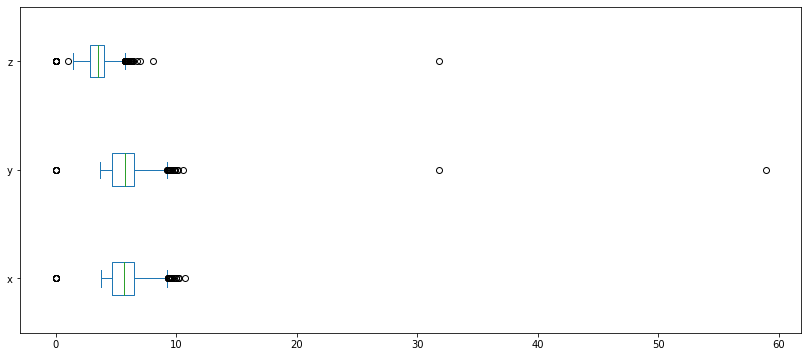

In [12]:
#outliers for x,y,z
data.loc[:,['x','y','z']].plot(kind='box', vert=False, figsize=(14,6))

# Outliers Validation

**Outliers is maybe a correct value we are need it for training**

**or maybe its incorrect value and should be delete it**

**, so NOW we will validate its correct or incorrect**

In [13]:
#checking outliers for carat that greater than 3 ,as we can see this outliers is correct values 
data[data['carat']>3]

,carat,cut,color,clarity,depth,table,price,x,y,z
15611,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
17451,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
17532,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
17985,3.05,Premium,E,I1,60.9,58.0,10453,9.26,9.25,5.66
18074,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
18239,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
18948,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
19345,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
19475,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
19496,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [14]:
#checking outliers for price that greater than 18015 ,as we can see this outliers is correct values 
data[data['price']>18015]

,carat,cut,color,clarity,depth,table,price,x,y,z
22038,2.05,Ideal,G,SI2,61.6,56.0,18017,8.11,8.16,5.01
22039,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
22040,2.51,Premium,J,VS2,62.2,58.0,18020,8.73,8.67,5.41
22041,2.00,Good,H,VS2,63.8,59.0,18023,7.88,8.01,5.07
22042,2.04,Good,H,SI1,58.4,60.0,18026,8.31,8.36,4.87
...,...,...,...,...,...,...,...,...,...,...
22320,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
22321,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
22322,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
22323,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [15]:
#checking outliers for (y) that equal 0 ,as we can see this outliers is incorrect values 
data[data['y']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
9722,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
12918,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
19640,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
22050,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
39924,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
39925,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [16]:
#here we are validate of real values to (x,y,z) for record number(9722) by extract records that are similar to it 
#as we can see, 
#value of x should be in range(6.30,6,50) instead of zero 
#value of y should be in range(6.20,6,40) instead of zero 
#value of z should be in range(3.9,4.10) instead of zero 
data[(data['carat']==1)& (data['cut']=='Very Good') &(data['color']=='H') &(data['clarity']=='VS2')&(data['depth']==63.3)]

,carat,cut,color,clarity,depth,table,price,x,y,z
7359,1.0,Very Good,H,VS2,63.3,60.0,4514,6.31,6.22,3.97
7908,1.0,Very Good,H,VS2,63.3,62.0,4652,6.37,6.29,4.01
9289,1.0,Very Good,H,VS2,63.3,53.0,5000,6.42,6.37,4.05
9722,1.0,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00


In [17]:
#here we are validate of real values to (x,y,z) for record number(12918) by extract records that are similar to it  
data[(data['carat']==1.14)& (data['cut']=='Fair') ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2741,1.14,Fair,J,SI2,64.4,55.0,3403,6.56,6.54,4.22
12918,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00


In [18]:
#here we are validate of real values to (x,y,z) for record number(19640) by extract records that are similar to it 
#as we can see, 
#value of x should be in range(7.30,7,50) instead of zero 
#value of y should be in range(7.40,7,50) instead of zero 
#value of z should be in range(4.50,4.60) instead of zero 
data[(data['carat']==1.56)& (data['cut']=='Ideal') &(data['color']=='G') &(data['clarity']=='VS2')]

,carat,cut,color,clarity,depth,table,price,x,y,z
19640,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
20179,1.56,Ideal,G,VS2,62.3,53.0,13787,7.41,7.49,4.64
20410,1.56,Ideal,G,VS2,61.3,56.0,14237,7.48,7.50,4.59


In [19]:
#here we are validate of real values to (x,y,z) for record number(22050) by extract records that are similar to it 
#as we can see, 
#value of x should be in range(8.45,8.60) instead of zero 
#value of y should be in range(8.40,8.50) instead of zero 
#value of z should be in range(5.19,5.25) instead of zero 
data[(data['carat']==2.25)& (data['cut']=='Premium') &(data['color']=='H') ]

,carat,cut,color,clarity,depth,table,price,x,y,z
21764,2.25,Premium,H,SI1,61.5,61.0,17233,8.47,8.41,5.19
22050,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00


In [20]:
#here we are validate of real values to (x,y,z) for record number(39924) by extract records that are similar to it 
#as we can see, 
#value of x should be in range(5.50,7,50) instead of zero 
#value of y should be in range(5.60,6,50) instead of zero 
#value of z should be in range(3.6,4) instead of zero 
data[(data['carat']==0.71)& (data['cut']=='Good') &(data['color']=='F') &(data['clarity']=='SI2')]

,carat,cut,color,clarity,depth,table,price,x,y,z
37919,0.71,Good,F,SI2,64.0,58.0,1818,5.65,5.59,3.60
39638,0.71,Good,F,SI2,63.6,60.0,2072,5.64,5.61,3.58
39924,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
39925,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
40640,0.71,Good,F,SI2,64.5,55.6,2282,5.58,5.61,3.60


In [21]:
#here we are validate of real values to (x,z) for record number(39925) by extract records that are similar to it 
#as we can see, 
#value of x should be in range(6.30,6,56) instead of zero 
#value of z should be in range(4,4.10) instead of zero 
data[(data['carat']==1.07)& (data['cut']=='Ideal') &(data['color']=='F') &(data['clarity']=='SI2')&(data['depth']==61.6)]

,carat,cut,color,clarity,depth,table,price,x,y,z
9130,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
10507,1.07,Ideal,F,SI2,61.6,57.0,5405,6.56,6.53,4.03


In [22]:
#this outlier the maximum value of (y)
data[data['y']==58.9]

,carat,cut,color,clarity,depth,table,price,x,y,z
19301,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


In [23]:
#this outlier the maximum value of (z)
data[data['z']==31.8]

,carat,cut,color,clarity,depth,table,price,x,y,z
39072,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [24]:
#as we observed the maximum value for z in record 39072 is wrong ,i think the real value is 3.18
#This error is caused by entering the value
data[(data['carat']==0.51)& (data['cut']=='Very Good') &(data['color']=='E') &(data['clarity']=='VS1')]

,carat,cut,color,clarity,depth,table,price,x,y,z
35541,0.51,Very Good,E,VS1,58.1,60.0,1583,5.28,5.32,3.08
36062,0.51,Very Good,E,VS1,64.4,55.0,1634,5.03,5.07,3.25
36074,0.51,Very Good,E,VS1,62.0,61.0,1636,5.11,5.14,3.18
36752,0.51,Very Good,E,VS1,60.4,59.0,1697,5.16,5.20,3.13
36920,0.51,Very Good,E,VS1,60.0,57.0,1717,5.18,5.25,3.13
36921,0.51,Very Good,E,VS1,61.0,59.0,1717,5.13,5.17,3.14
37475,0.51,Very Good,E,VS1,61.6,59.0,1778,5.10,5.12,3.15
38112,0.51,Very Good,E,VS1,61.1,59.0,1839,5.14,5.20,3.16
38123,0.51,Very Good,E,VS1,59.6,56.0,1841,5.19,5.24,3.11
39072,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


In [25]:
#as we observed the maximum value for y in record 19301 is wrong ,i think the real value is 8.90
#This error is caused by entering the value
data[(data['carat']==2.0)& (data['cut']=='Premium') &(data['color']=='H') &(data['clarity']=='SI2')&(data['table']==57.0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
19146,2.0,Premium,H,SI2,62.8,57.0,11975,8.05,8.01,5.04
19301,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


In [26]:
#outliers for y that are greater than 30
data[data['y']>30]

,carat,cut,color,clarity,depth,table,price,x,y,z
19301,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
39650,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [27]:
#as we observed the value for y in record 39650 is wrong 
#This error is caused by entering the value
data[(data['carat']==0.51)& (data['cut']=='Ideal') &(data['color']=='E') &(data['clarity']=='VS1')&(data['depth']==61.8)]

,carat,cut,color,clarity,depth,table,price,x,y,z
36754,0.51,Ideal,E,VS1,61.8,55.0,1697,5.15,5.18,3.19
38262,0.51,Ideal,E,VS1,61.8,56.0,1851,5.17,5.19,3.20
39650,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


**Split categorical and numeric features**

In [28]:
numeric_data = data.select_dtypes(include=[np.number]).columns
categorical_data = data.select_dtypes(exclude=[np.number]).columns

In [29]:
numeric_data

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [30]:
categorical_data

Index(['cut', 'color', 'clarity'], dtype='object')

**Unique Values for categorical data**

In [31]:
for i in categorical_data:
    print(data[i].unique())

['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
['E' 'I' 'J' 'F' 'H' 'D' 'G']
['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


**Visulaization for Categorical data**

In [32]:
def pie(column):
    labels=data[column].unique()
    size=[]
    for i in labels:
        value=data[column].value_counts()[[i]]
        size.append(int(value.values))
    return labels,size

**Percentage for Unique values in each Categorical Feature**

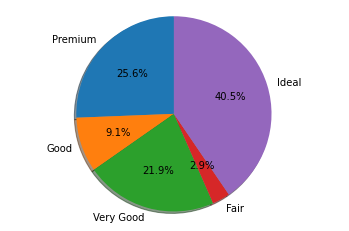

In [33]:
labels,sizes=pie('cut')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

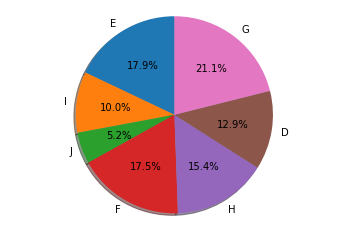

In [34]:
labels,sizes=pie('color')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

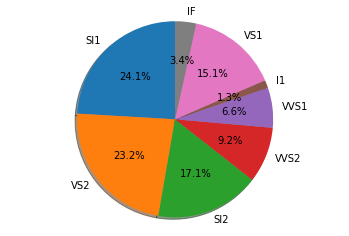

In [35]:
labels,sizes=pie('clarity')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

**barplot for price and clarity**

<AxesSubplot:xlabel='clarity', ylabel='price'>

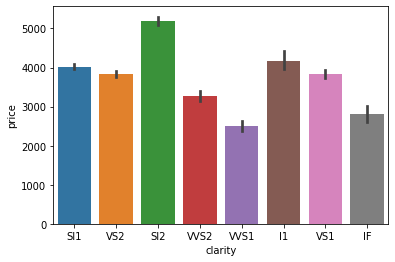

In [36]:
sns.barplot(data=data,x='clarity',y='price')

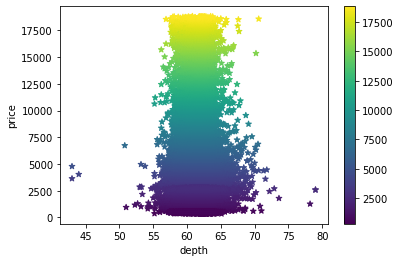

In [37]:
#from this plot we can detect outlires , and there isn't any correlation between price and depth
plt.scatter('depth','price',data=data,c='price',marker='*')
plt.xlabel('depth')
plt.ylabel('price')
plt.colorbar()
plt.show()

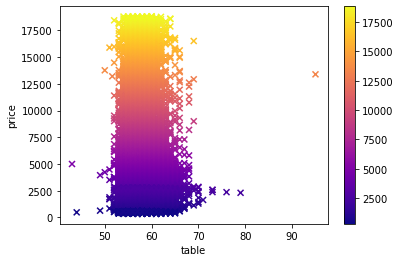

In [38]:
#from this plot we can detect outlires , and there isn't any correlation between price and table
plt.scatter('table','price',data=data,c='price',marker='x',cmap='plasma')
plt.xlabel('table')
plt.ylabel('price')
plt.colorbar()
plt.show()

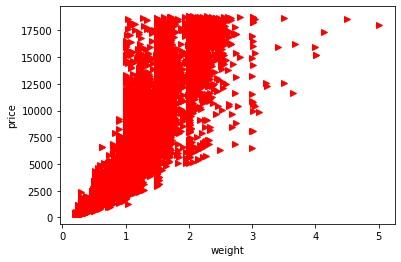

In [39]:
#from this plot we can detect outlires , and there is positive correlation between price and carat
plt.plot(data['carat'],data['price'],'r>')
plt.xlabel('weight')
plt.ylabel('price')
plt.show()

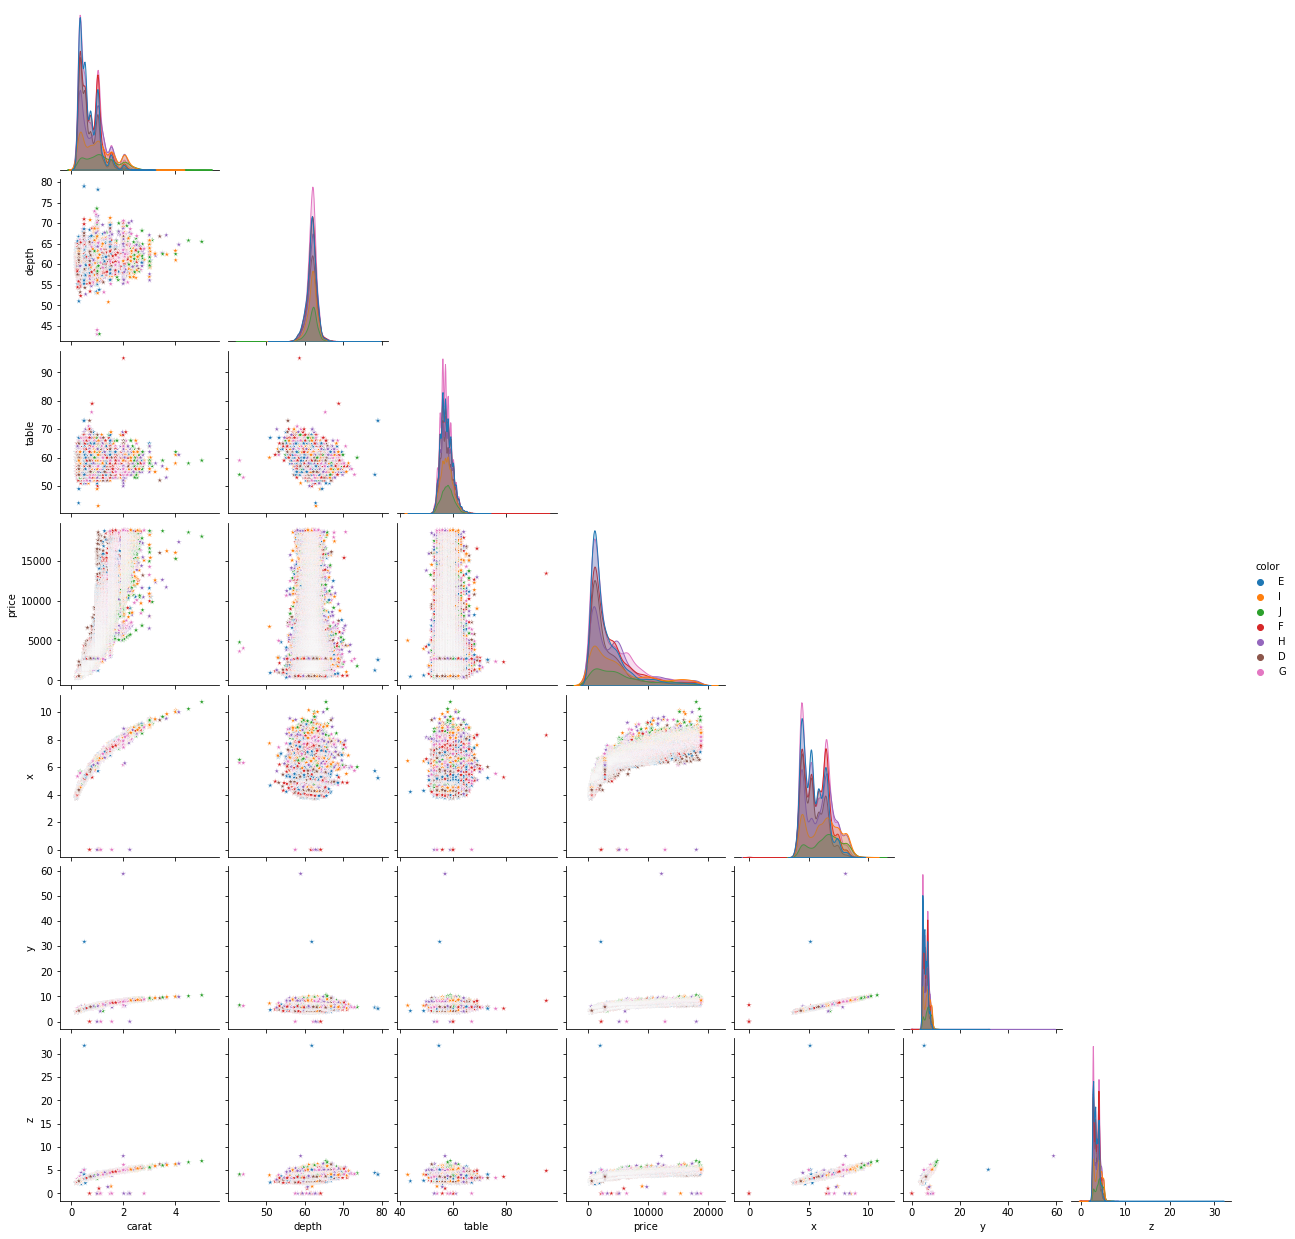

In [40]:
sns.pairplot(data,corner=True,markers='*',hue='color')
plt.show()

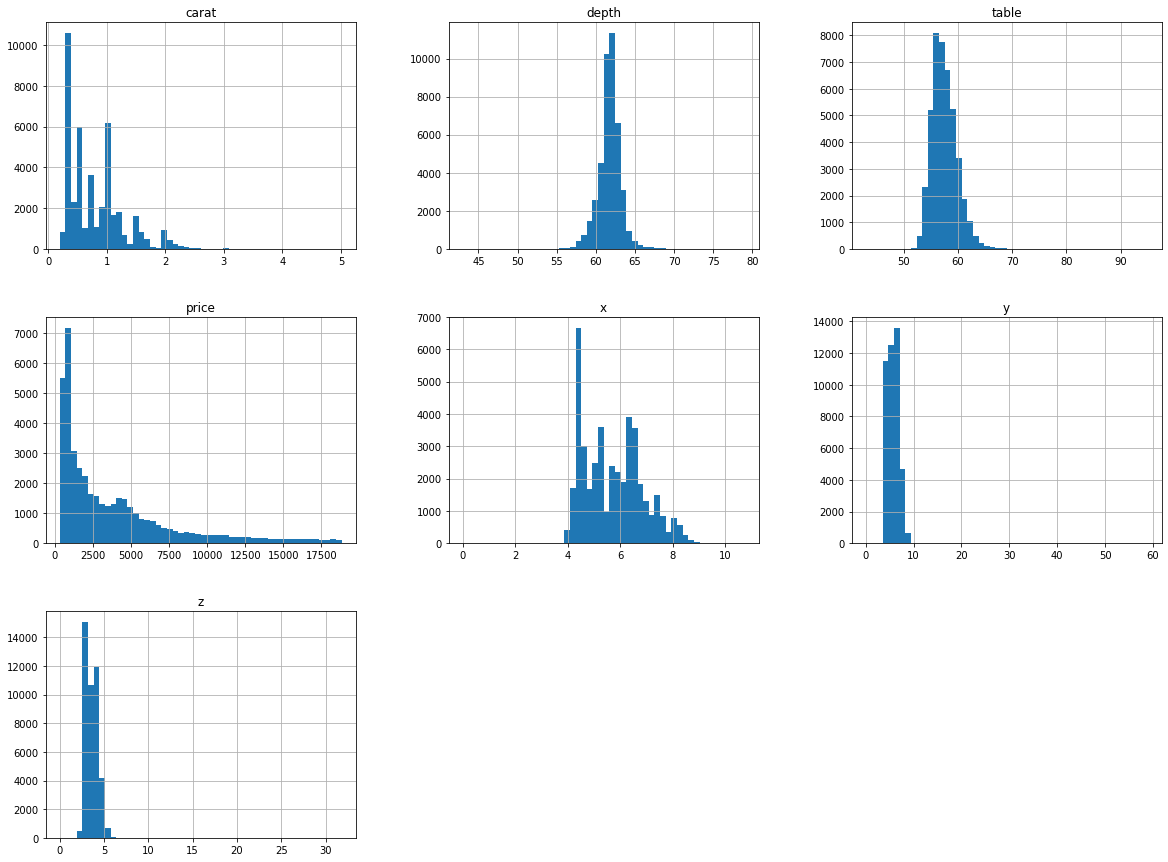

In [41]:
data.hist(bins=50, figsize=(20,15))
plt.show()


 mu = 3942.71 and sigma = 4023.49



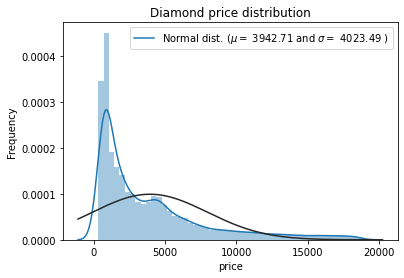

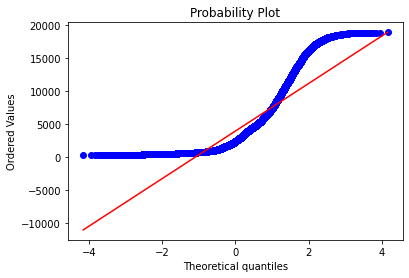

In [42]:
sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Diamond price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()


 mu = 7.79 and sigma = 1.02



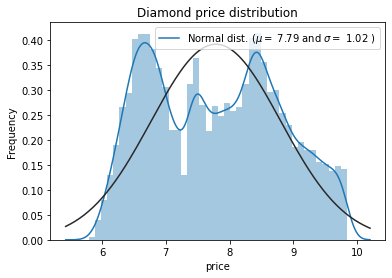

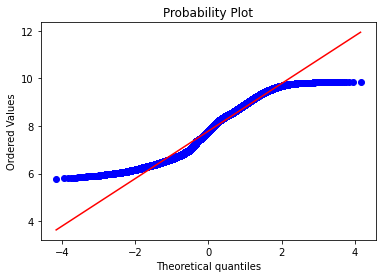

In [43]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["price"] = np.log1p(data["price"])

#Check the new distribution 
sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Diamond price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

In [44]:
# Check the skew of all numerical features
skewed_feats = data[numeric_data].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
y,2.871753
z,1.798863
carat,1.171929
table,0.820001
x,0.413591
price,0.122700
depth,-0.081925


<AxesSubplot:xlabel='price', ylabel='Density'>

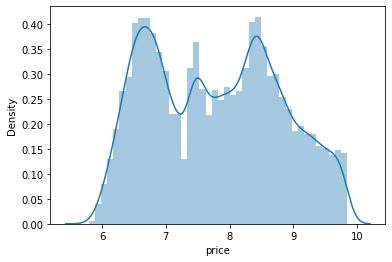

In [45]:
#density for price
sns.distplot(data['price'])

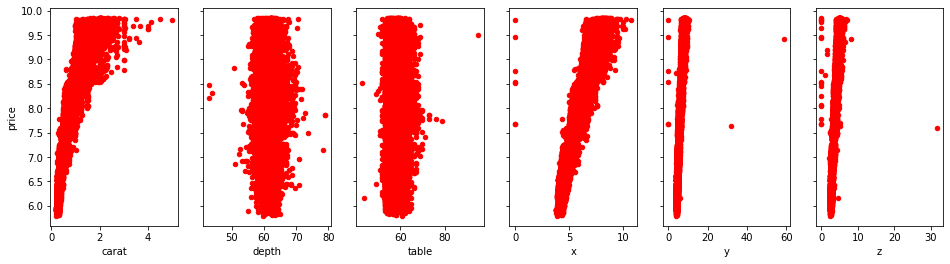

In [46]:
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['carat','depth','table','x','y','z']
for i, c in zip(range(6), col_name):
    data.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='r')

In [47]:
#function for replace all outliers with Nan
def outlier_detect(columns):
    for column in columns: 
        for x in [column]:
            q75,q25 = np.percentile(data.loc[:,x],[75,25])
            intr_qr = q75-q25

            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)

            data.loc[data[x] < min,x] = np.nan
            data.loc[data[x] > max,x] = np.nan

In [48]:
outlier_detect(list(numeric_data))

In [49]:
#sum of outliers in data
data.isnull().sum()

carat      1660
cut           0
color         0
clarity       0
depth      1998
table       477
price         0
x            31
y            30
z            46
dtype: int64